# LIB's

In [1]:
import pandas as pd 

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np

import os 

import warnings
warnings.filterwarnings('ignore')

## HELPER FUNCTIONS


In [2]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]




## DATASET's

### DADOS CORONAVIRUS

Os dados referente aos novos casos, casos acumulados, óbitos, etc., foram extraídos da plataforma do Ministério da Saúde, veículo oficial de comunicação sobre a situação epidemiológica da COVID-19 no Brasil.

A extração foi feita em 19/01/21.

Dataset disponível em: https://covid.saude.gov.br/

In [3]:
covid = pd.read_csv(r'/Users/daianeklein/Documents/Desafio-COVID/Dados/HIST_PAINEL_COVIDBR_19jan2021.csv',
                   encoding='latin-1', sep=';')

In [4]:
# Separando os dados por UF

# Criando uma lista com as UF
uf = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG','PA',
'PB','PR','PE','PI','RJ','RN','RS','RO','RR','SC','SP','SE','TO']

# Retirando valores duplicados (base de dados possui por estado e tbm por municipio)
covid = covid[covid['municipio'].isnull()]

# Selecionando as colunas alvo
colunas = ['regiao', 'estado', 'data','casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos']

covid = covid[colunas]
covid = covid[covid['estado'].isin(uf)]

covid.sample(10)

,regiao,estado,data,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
144922,Nordeste,MA,2020-11-15,0,0,0,0
8336,Centro-Oeste,MT,2020-05-19,995,58,32,3
8682,Centro-Oeste,GO,2020-06-04,4944,374,164,9
3255,Nordeste,PI,2020-12-04,129825,729,2658,8
5329,Nordeste,BA,2020-04-12,673,38,21,0
5650,Sudeste,MG,2020-04-03,397,27,6,2
50237,Norte,RR,2020-04-28,0,0,0,0
5236,Nordeste,SE,2020-12-05,91854,61,2329,5
1557,Norte,RR,2020-10-17,54019,293,681,1
6538,Sudeste,RJ,2020-11-17,330009,2554,21474,173


### PROJEÇÃO DA POPULAÇÃO DO BRASIL POR SEXO E IDADE SIMPLES: 2000-2060

A projeção da população do Brasil é um estudo feito pelo IBGE de fundamental importância para cálculo de indicadores sociodemográficos, elaboração de políticas públicas, bem como estratégias de planejamento do setor privado.

As Projeções da População do Brasil e das Unidades da Federação são elaboradas com base nas informações sobre as componentes da dinâmica demográfica oriundas dos censos demográficos, das pesquisas domiciliares por amostragem e dos registros administrativos de nascimentos e óbitos investigados pelo IBGE. (Fonte IBGE)

O arquivo utilizado neste notebook está disponível em: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?ibge/cnv/projpopbr.def

In [5]:
# importação do dataset de populacao estimada
populacao = pd.read_csv(r'/Users/daianeklein/Documents/Desafio-COVID/Dados/POPULACAO.csv',
                       encoding='latin-1', sep = ';', skiprows=3, skipfooter=4, engine='python') 

#index que serão excluídos
excluir = ['Região Norte','Região Sudeste','Região Sul','Região Centro-Oeste','Total','Região Nordeste', ' Fonte:']

# Definindo os indices
populacao.set_index('Região/Unidade da Federação', inplace=True)

# Excluindo as linhas
populacao.drop(excluir, inplace = True)

### CNES - RECURSOS FÍSICOS - HOSPITALAR - LEITOS DE INTERNAÇÃO - BRASIL

O CNES é a sigla para Cadastro Nacional de Estabelecimentos de Saúde, instituído pelo Ministério da Saúde e responsável pelo cadastro de dados de estabelecimentos que prestem assistência à saúde, seja público ou privado.

O objetivo do CNES é manter o cadastro de todos os estabelecimentos de saúde, hospitalares e ambulatoriais (consultório médico ou
odontológico isolado, consultórios de psicologia, fisioterapia, policlínicas, clinicas especializadas,
laboratórios, serviços de diagnose e terapia ou, ainda, unidade de Vigilância Sanitária ou
epidemiológica), mantendo-os atualizados para servir de suporte à estratégias e planos relacionados à saúde.

**Neste estudo, foram considerados os leitos de internação públicos e privados**

http://tabnet.datasus.gov.br/cgi/tabcgi.exe?cnes/cnv/leiintbr.def

In [6]:
leitos = pd.read_csv(r'/Users/daianeklein/Documents/Desafio-COVID/Dados/leitos.csv',
                       encoding='latin-1', sep = ';', skiprows=3, skipfooter=12, engine='python')

#index que serão excluídos
excluir = ['Região Norte','Região Sudeste','Região Sul','Região Centro-Oeste','Região Nordeste' ]

# Definindo os índices
leitos.set_index('Região/Unidade da Federação', inplace = True)

#Excluindo as linhas
leitos.drop(excluir, inplace = True)


### PROCEDIMENTOS HOSPITALARES DO SUS - POR LOCAL DE INTERNAÇÃO - BRASIL

Os dados referente aos procedimentos hospitalares são disponibilizados pelo Ministério da Saúde através da plataforma DATASUS. 

Para esta análise, foram considerados os procedimentos por local de internação e por data de processamento.
Também foram utilizados somente os atendimentos de emergência (uma vez que o foco é COVID, foram expurgados atendimentos relacionados à acidente de trabalho, trânsito, produtos químicos, etc).

http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def

In [7]:
internacoes = pd.read_csv(r'/Users/daianeklein/Documents/Desafio-COVID/Dados/INTERNACOES.csv',
                       encoding='latin-1', sep = ';', skiprows=4, skipfooter=12, engine='python')

#index que serão excluídos
excluir = ['Região Norte','Região Sudeste','Região Sul','Região Centro-Oeste','Região Nordeste', ]

# Definindo os índices
internacoes.set_index('Região/Unidade da Federação', inplace = True)

#Excluindo as linhas
internacoes.drop(excluir, inplace = True)

internacoes

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,...,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,Total
Região/Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
.. Rondônia,5891,6608,6950,6857,7343,7032,6950,6792,6739,7134,...,8120,6498,6671,5883,7266,7228,7227,6089,5942,1082097
.. Acre,2493,2258,2264,2482,2443,2252,2169,2194,-,2373,...,2220,1831,1667,1830,1975,2192,2007,2651,2012,318843
.. Amazonas,8076,7550,10923,9855,9699,9123,9518,9736,10267,9920,...,13742,11514,12722,13301,12970,11930,13380,12285,11474,1609758
.. Roraima,1909,1625,1809,1962,2500,2072,2137,2482,2612,1814,...,3119,2848,2685,2630,2565,2889,2708,3254,2873,384759
.. Pará,37798,37466,40237,39580,39517,38518,42550,41660,41923,41556,...,35157,28291,27728,30235,30581,34738,30550,29206,27309,5276252
.. Amapá,2401,2630,2531,2771,2338,2258,2305,2229,2305,2345,...,1865,1602,1751,2053,2681,2606,2398,1778,1903,329532
.. Tocantins,7005,7570,7485,7421,7666,7718,7335,7394,7454,7454,...,6255,5897,5995,5765,6430,6056,5841,5863,5628,971293
.. Maranhão,19031,20516,21625,22096,22010,22252,22866,23362,24323,24416,...,29746,24830,25523,25054,26568,26018,25316,24775,22285,3956202
.. Piauí,15556,15397,16410,17209,17934,18614,17988,17159,17128,16748,...,13993,11632,12193,13099,13903,14437,12881,13449,8053,2252776


### PORTAL DA TRANSPARÊNCIA - Recursos Transferidos

Com o objetivo de identificar os recursos transferidos para os estados, foram utilizados os dados disponíveis no portal da transparência. 

Os dados foram extraídos do site http://www.portaltransparencia.gov.br/funcoes/10-saude?ano=2020. Não havia abertura por mês, portanto, foram utilizados os valores anuais e quando necessário, divididos por 12.

***

Não foi possível utilizar os dados disponibilizados no link: http://www.portaltransparencia.gov.br/download-de-dados/transferencias devido inconsistência nas informações (provavelmente data de processamento incorreta)

In [8]:
despesas = pd.read_csv('despesas.csv', sep=';', encoding='UTF-8')
despesas 

,LOCALIDADE,2016,2017,2018,2019,2020
0,Acre,295084471,"296810594,4","356892876,3","370052003,6",432255159
1,Alagoas,1085344451,1115745214,1357440089,1469948488,1482194788
2,Amapá,"213565337,5","207071360,6","250371774,5","244969340,1","385382870,2"
3,Amazonas,"914760077,6","903687628,1","993738417,4",1085240205,1275896645
4,Bahia,4255454408,4320569086,4901940202,5273034706,5624715575
5,Ceará,2777013793,2957495853,3262145797,3567192479,3687313681
6,Distrito Federal,7739009392,7986980907,7233719959,6749097566,6107228349
7,Espírito Santo,1055926663,1101778678,1223234672,1351502879,1373350234
8,Goiás,1800106720,1831349004,2066091021,2277628619,2455398948
9,Maranhão,1928363298,1978617665,2262914387,2426943630,2489307917


### TRANFORMAÇÃO DOS DADOS



In [9]:
# Alteração do tipo de dado
covid['data'] = covid['data'].astype('datetime64')

In [10]:
# Criação de uma coluna com dia, mes e ano
covid['dia'] = covid['data'].dt.day
covid['mes'] = covid['data'].dt.month
covid['ano'] = covid['data'].dt.year

## ANÁLISES MACROS

In [11]:
novos_casos = covid[['data', 'casosNovos']].groupby('data').sum().reset_index()

<Figure size 432x288 with 0 Axes>

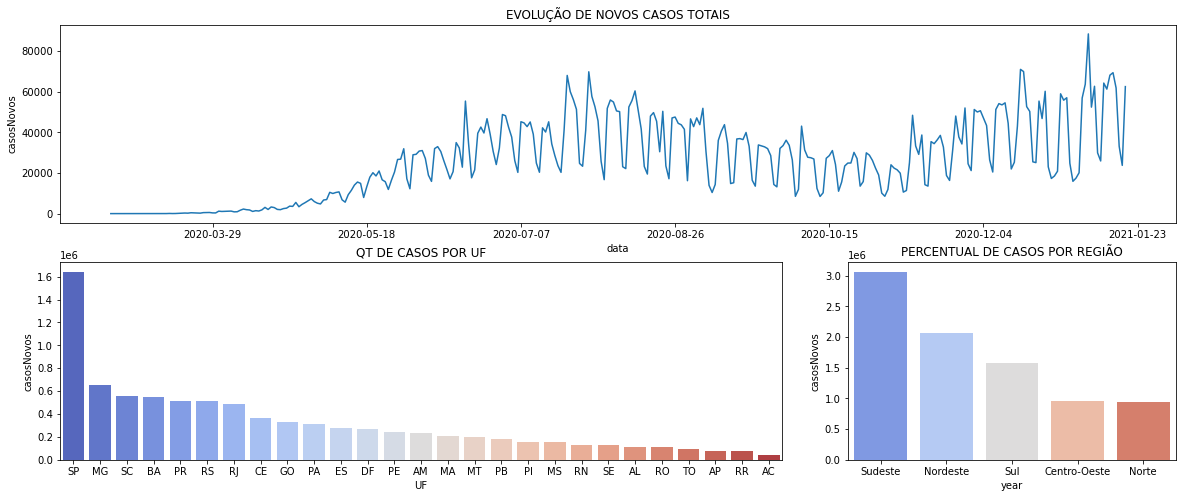

In [12]:
fig3 = plt.figure(constrained_layout=True)
fig3 = plt.figure(figsize=(20,8))

#######


gs = fig3.add_gridspec(2, 3) ## number of charts


graph1 = fig3.add_subplot(gs[0, :]) ##chart 1
graph1.set_title('EVOLUÇÃO DE NOVOS CASOS TOTAIS')
graph1 = sns.lineplot(data=novos_casos, x='data', y='casosNovos', palette='coolwarm')
graph1.xaxis.set_major_locator(ticker.AutoLocator())


#######

c = covid[['estado', 'casosNovos']].groupby('estado').sum().reset_index().sort_values(by='casosNovos',
                                                                                     ascending=False)

graph2 = fig3.add_subplot(gs[1, :-1])
graph2.set_title('QT DE CASOS POR UF')
graph2 = sns.barplot(data = c, x = 'estado', y='casosNovos', palette='coolwarm')
graph2 = plt.xlabel('UF')


#######
b = data = covid[['regiao', 'casosNovos']].groupby('regiao').sum().reset_index().sort_values(by='casosNovos', ascending=False)

graph3 = fig3.add_subplot(gs[1:, -1])
graph3.set_title('PERCENTUAL DE CASOS POR REGIÃO')
graph3 = sns.barplot(data = b, x='regiao', y='casosNovos',palette='coolwarm')
graph3 = plt.xlabel('year')


#######

fig3 = fig3



<Figure size 432x288 with 0 Axes>

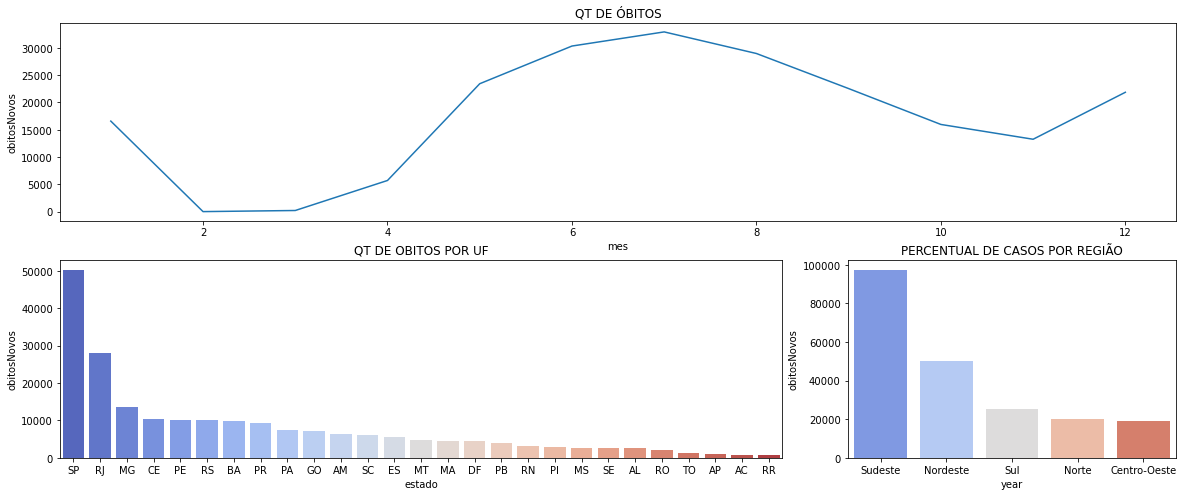

In [13]:
fig3 = plt.figure(constrained_layout=True)
fig3 = plt.figure(figsize=(20,8))

#######


gs = fig3.add_gridspec(2, 3) ## number of charts

obitos = covid[['mes', 'obitosNovos']].groupby('mes').sum()
graph1 = fig3.add_subplot(gs[0, :]) ##chart 1
graph1.set_title('QT DE ÓBITOS')
graph1 = sns.lineplot(data=obitos, x='mes', y='obitosNovos', palette='coolwarm', ci=False)
graph1.xaxis.set_major_locator(ticker.AutoLocator())


#######

obitos_uf = covid[['estado', 'obitosNovos']].groupby('estado').sum().reset_index()
order = obitos_uf.sort_values(by='obitosNovos', ascending=False)['estado']

graph2 = fig3.add_subplot(gs[1, :-1])
graph2.set_title('QT DE OBITOS POR UF')
graph2 = sns.barplot(data = obitos_uf, x ='estado',y='obitosNovos' , palette='coolwarm',
                    order = order)



#######

a = covid[['regiao', 'obitosNovos']].groupby('regiao').sum().reset_index().sort_values(by='obitosNovos', 
                                                                                       ascending=False)

graph3 = fig3.add_subplot(gs[1:, -1])
graph3.set_title('PERCENTUAL DE CASOS POR REGIÃO')
graph3 = sns.barplot(data = a, x= 'regiao', y='obitosNovos',
                     palette='coolwarm')
graph3 = plt.xlabel('year')


#######

fig3 = fig3



### COVID x POPULAÇÃO

In [14]:
# ajustando o nome dos estados
populacao.reset_index(inplace = True)
populacao['Região/Unidade da Federação'].replace('.. ', '', inplace = True, regex=True)

# Dicionario com estados e UF
siglas = {
'Acre':'AC',
'Alagoas':'AL',
'Amapá':'AP',
'Amazonas':'AM',
'Bahia':'BA',
'Ceará':'CE',
'DistriFederal':'DF',
'EspíriSanto':'ES',
'Goiás':'GO',
'Maranhão':'MA',
'MaGrosso':'MT',
'MaGrosSul':'MS',
'MinGerais':'MG',
'Pará':'PA',
'Paraíba':'PB',
'Paraná':'PR',
'Pernambuco':'PE',
'Piauí':'PI',
'RJaneiro':'RJ',
'RGranNorte':'RN',
'RGranSul':'RS',
'Rondônia':'RO',
'Roraima':'RR',
'SanCatarina':'SC',
'SPaulo':'SP',
'Sergipe':'SE',
'Tocantins':'TO'
}

# Inserindo a coluna com uf
populacao['uf'] = populacao['Região/Unidade da Federação'].map(siglas)

In [15]:
populacao_e_contagio = populacao[['uf', '2019']]

#qt de casos por UF
covid_por_uf = covid[['estado', 'casosNovos']].groupby('estado').sum().reset_index()
covid_por_uf.rename(columns={'estado' : 'uf'}, inplace=True) # renomeando as colunas

# qt de obitos por UF
obitos_por_uf = covid[['estado', 'obitosNovos']].groupby('estado').sum().reset_index()
obitos_por_uf.rename(columns={'estado' : 'uf'}, inplace=True)

populacao_e_contagio = populacao_e_contagio.merge(covid_por_uf, on='uf', how = 'inner') #inserindo casos
populacao_e_contagio = populacao_e_contagio.merge(obitos_por_uf, on='uf', how = 'inner') #inserindo obitos
populacao_e_contagio.rename(columns={'2019' : 'Populacao_2019'}, inplace=True) #renomeando a coluna 2019

In [16]:
# Calculando a qt de contagio para cada 1k de habitantes
populacao_e_contagio['contagio_1k_habitante'] = (populacao_e_contagio['casosNovos'] /  populacao_e_contagio['Populacao_2019']) * 1000

# Calculando a qt de obitos para cada 1k de habitantes
populacao_e_contagio['mortalidade_1k'] = (populacao_e_contagio['obitosNovos'] /  populacao_e_contagio['Populacao_2019']) * 1000

# Calculando a qt de obitos pela qt. de contagios
populacao_e_contagio['letalidade_1k'] = (populacao_e_contagio['obitosNovos'] / populacao_e_contagio['casosNovos'] ) * 1000

populacao_e_contagio

,uf,Populacao_2019,casosNovos,obitosNovos,contagio_1k_habitante,mortalidade_1k,letalidade_1k
0,RO,1841142.0,111372,2044,60.490717,1.110181,18.352907
1,AC,854691.0,45208,839,52.893970,0.981641,18.558662
2,AM,4182899.0,233971,6450,55.935130,1.541993,27.567519
3,RR,538963.0,73134,823,135.693916,1.527006,11.253316
4,PA,8544639.0,311063,7427,36.404464,0.869200,23.876192
5,AP,828028.0,74045,1010,89.423305,1.219766,13.640354
6,TO,1583391.0,97196,1323,61.384712,0.835549,13.611671
7,MA,7083578.0,203964,4618,28.793923,0.651930,22.641250
8,PI,3229651.0,152211,2968,47.129241,0.918985,19.499248
9,CE,9128090.0,362919,10240,39.758482,1.121812,28.215662


<Figure size 432x288 with 0 Axes>

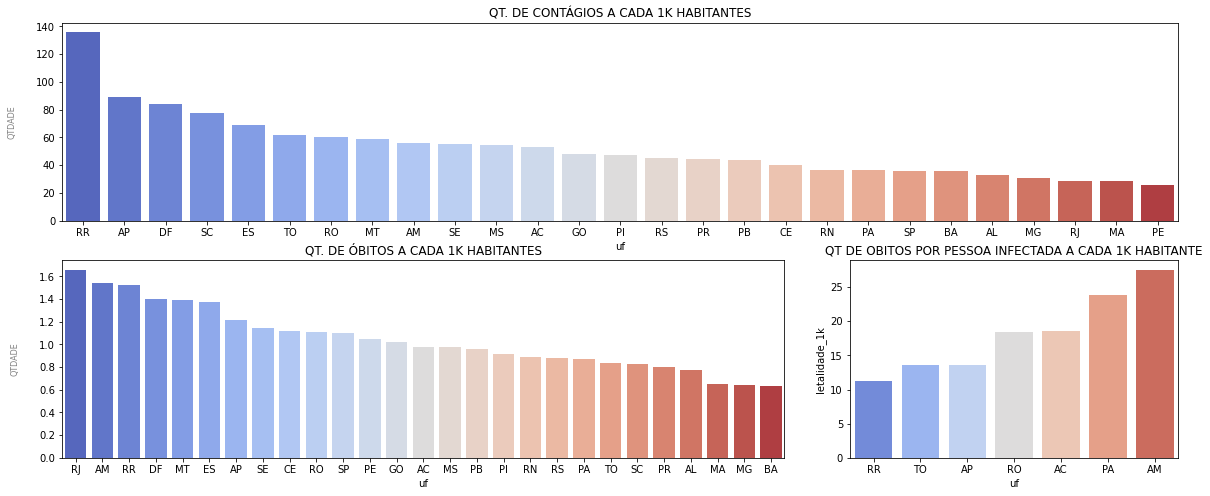

In [17]:
fig3 = plt.figure(constrained_layout=True)
fig3 = plt.figure(figsize=(20,8))

#######


gs = fig3.add_gridspec(2, 3) ## number of charts


graph1 = fig3.add_subplot(gs[0, :]) ##chart 1

graph1.set_title('QT. DE CONTÁGIOS A CADA 1K HABITANTES')
sns.barplot(data = populacao_e_contagio.sort_values('contagio_1k_habitante', ascending=False), x= 'uf', y='contagio_1k_habitante',
                     palette='coolwarm')
plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)



#######


order = obitos_uf.sort_values(by='obitosNovos', ascending=False)['estado']
graph2 = fig3.add_subplot(gs[1, :-1])
graph2.set_title('QT. DE ÓBITOS A CADA 1K HABITANTES')

graph2= sns.barplot(data = populacao_e_contagio.sort_values('mortalidade_1k', ascending=False), x= 'uf', y='mortalidade_1k', 
                                         palette='coolwarm')

plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)


#######

norte = ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO']


graph3 = fig3.add_subplot(gs[1:, -1])
graph3.set_title('QT DE OBITOS POR PESSOA INFECTADA A CADA 1K HABITANTE')
graph3 = sns.barplot(data = populacao_e_contagio[populacao_e_contagio['uf'].isin(norte)].sort_values(by='letalidade_1k'), x= 'uf', y='letalidade_1k',
                     palette='coolwarm')


#######

fig3 = fig3;



In [18]:
populacao_e_contagio[['uf','letalidade_1k']].sort_values(by='letalidade_1k',
                                                                             ascending=False).style.apply(highlight_max)

,uf,letalidade_1k
18,RJ,57.571189
12,PE,41.387568
19,SP,30.598197
9,CE,28.215662
2,AM,27.567519
10,RN,24.340895
4,PA,23.876192
24,MT,23.749590
13,AL,23.602872
7,MA,22.641250


In [19]:
populacao_e_contagio[['uf','mortalidade_1k']].sort_values(by='mortalidade_1k',
                                                                             ascending=False).style.apply(highlight_max)

,uf,mortalidade_1k
18,RJ,1.660868
2,AM,1.541993
3,RR,1.527006
26,DF,1.402709
24,MT,1.396172
17,ES,1.374531
5,AP,1.219766
14,SE,1.146988
9,CE,1.121812
0,RO,1.110181


### LEITOS x POPULAÇÃO

In [20]:
# ajustando o nome dos estados
leitos.reset_index(inplace = True)
leitos['Região/Unidade da Federação'].replace('.. ', '', inplace = True, regex=True)

# Inserindo a coluna com uf
leitos['uf'] = leitos['Região/Unidade da Federação'].map(siglas)

# transformando 'uf' em index
leitos.set_index('uf', inplace=True)

# Excluindo a coluna leitos
leitos.drop(columns=('Região/Unidade da Federação'), inplace=True)

# Slice do ano
# Criando a coluna ano
leitos = leitos.T.reset_index()
leitos['ano'] = leitos['index'].str.slice(start = 0, stop = 4)

# Criando a coluna do mes
leitos['mes'] = leitos['index'].str.slice(start = 5, stop = 8)

In [21]:
# Transformando os meses para ingles
meses_port_ing = {
    "Jan": "Jan",
    "Fev": "Feb",
    "Mar": "Mar",
    "Abr": "Apr",
    "Mai": "May",
    "Jun": "Jun",
    "Jul": "Jul",
    "Ago": "Aug",
    "Set": "Sep",
    "Out": "Oct",
    "Nov": "Nov",
    "Dez": "Dec"
}

# traduzinho os meses
leitos['mes'] = leitos['mes'].map(meses_port_ing)

In [22]:
# Concatenando o ano e mes
leitos['data'] = leitos['ano'] + "-" + leitos['mes']

# Alterando o tipo de dado
leitos['data'] = pd.to_datetime(leitos['data'])

# removendo as colunas
leitos.drop(columns=(['index', 'ano', 'mes']), inplace = True)  

# Fazendo melt
leitos = leitos.melt(id_vars='data', value_name='qt_leitos')

# Criando a coluna de mes e ano
leitos['mes'] = leitos['data'].dt.month
leitos['ano'] = leitos['data'].dt.year

leitos

,data,uf,qt_leitos,mes,ano
0,2009-01-01,RO,3588,1,2009
1,2009-02-01,RO,3660,2,2009
2,2009-03-01,RO,3665,3,2009
3,2009-04-01,RO,3666,4,2009
4,2009-05-01,RO,3680,5,2009
...,...,...,...,...,...
3883,2020-08-01,DF,7317,8,2020
3884,2020-09-01,DF,7364,9,2020
3885,2020-10-01,DF,7528,10,2020
3886,2020-11-01,DF,7609,11,2020


In [23]:
# Criando uma coluna considerando a qt. de leitos no mes 12
leitos_ano = leitos[leitos['mes'] == 12]
leitos_ano.drop(columns=(['data', 'mes']), inplace = True)

In [24]:
# Criando um 'contador' que servirá como chave
leitos_ano = leitos_ano.sort_values(by=['uf', 'ano'])
leitos_ano['contador'] = [num for num in np.arange(0,len(leitos_ano))]


In [25]:
# selecionando as colunas alvo
leitos_por_populacao = populacao[['uf', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020']]

# Fazendo melt
leitos_por_populacao = leitos_por_populacao.melt(id_vars='uf', var_name='ano', value_name='populacao')

# Criando contador para servir de chave
leitos_por_populacao = leitos_por_populacao.sort_values(by=['uf', 'ano'])
leitos_por_populacao['contador'] = [num for num in np.arange(0,len(leitos_por_populacao))]


In [26]:
# Fazendo merge
leitos_por_populacao = leitos_por_populacao.merge(leitos_ano[['qt_leitos', 'contador']], how='inner', on='contador')
leitos_por_populacao.drop(columns=('contador'), inplace=True)

# Calculo da quantidade de leitos por populacao
leitos_por_populacao['leitos_por_populacao'] = round((leitos_por_populacao['qt_leitos'] / leitos_por_populacao['populacao']) * 1000,4)

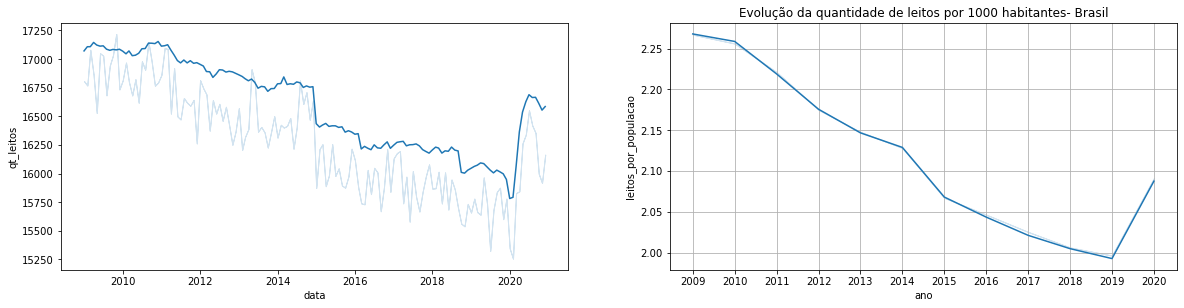

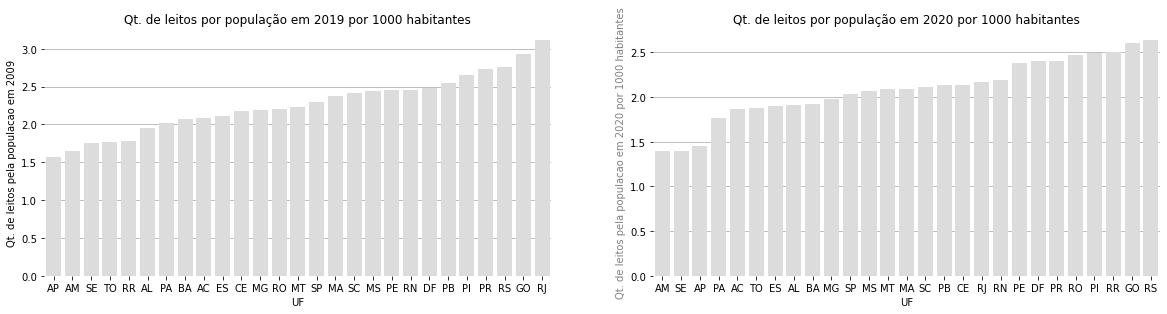

In [34]:
plt.figure(figsize=(20, 10))

ax3 = plt.subplot(2, 2, 1)
ax3 = sns.lineplot(data = leitos, x='data', y='qt_leitos', ci=False)

ax1 = plt.subplot(2, 2, 2)
sns.lineplot(data = leitos_por_populacao, y='leitos_por_populacao', x='ano', ci=False)
plt.title('Evolução da quantidade de leitos por 1000 habitantes- Brasil')
plt.grid(True)


plt.figure(figsize=(20, 10))
ax1 = plt.subplot(2, 2, 1)

ax1 = sns.barplot(data = leitos_por_populacao[leitos_por_populacao['ano'] == '2009'].sort_values(by='leitos_por_populacao'), 
                  x='uf', y ='leitos_por_populacao', hue='ano')
plt.xlabel('UF')
plt.ylabel('Qt. de leitos pela populacao em 2009')
plt.title('Qt. de leitos por população em 2019 por 1000 habitantes')
ax1.grid(axis='y')
ax1.set_axisbelow(True)
sns.despine(bottom = True, left=True)
ax1.legend().set_visible(False)


ax2 = plt.subplot(2, 2, 2)


ax = sns.barplot(data = leitos_por_populacao[leitos_por_populacao['ano'] == '2020'].sort_values(by='leitos_por_populacao'), 
                 x='uf', y ='leitos_por_populacao', hue='ano')
plt.xlabel('UF')
plt.ylabel('Qt. de leitos pela populacao em 2020 por 1000 habitantes', color = 'grey')
plt.title('Qt. de leitos por população em 2020 por 1000 habitantes')
ax2.grid(axis='y')
ax2.set_axisbelow(True)
sns.despine(bottom = True, left=True)
ax2.legend().set_visible(False)

ax;

In [28]:
leitos_por_populacao[leitos_por_populacao['ano'] == '2020'].sort_values(by='leitos_por_populacao')


,uf,ano,populacao,qt_leitos,leitos_por_populacao
35,AM,2020,4240210.0,5897,1.3907
299,SE,2020,2352207.0,3293,1.4000
47,AP,2020,842914.0,1226,1.4545
167,PA,2020,8628901.0,15267,1.7693
11,AC,2020,866811.0,1613,1.8608
323,TO,2020,1599316.0,2998,1.8746
95,ES,2020,4138657.0,7862,1.8997
23,AL,2020,3419689.0,6531,1.9098
59,BA,2020,15522855.0,29845,1.9226
131,MG,2020,21451356.0,42536,1.9829


### DESPESAS

In [29]:
despesas 

,LOCALIDADE,2016,2017,2018,2019,2020
0,Acre,295084471,"296810594,4","356892876,3","370052003,6",432255159
1,Alagoas,1085344451,1115745214,1357440089,1469948488,1482194788
2,Amapá,"213565337,5","207071360,6","250371774,5","244969340,1","385382870,2"
3,Amazonas,"914760077,6","903687628,1","993738417,4",1085240205,1275896645
4,Bahia,4255454408,4320569086,4901940202,5273034706,5624715575
5,Ceará,2777013793,2957495853,3262145797,3567192479,3687313681
6,Distrito Federal,7739009392,7986980907,7233719959,6749097566,6107228349
7,Espírito Santo,1055926663,1101778678,1223234672,1351502879,1373350234
8,Goiás,1800106720,1831349004,2066091021,2277628619,2455398948
9,Maranhão,1928363298,1978617665,2262914387,2426943630,2489307917


In [30]:
siglas2 = {'Acre':'AC',
'Alagoas':'AL',
'Amapá':'AP',
'Amazonas':'AM',
'Bahia':'BA',
'Ceará':'CE',
'Distrito Federal':'DF',
'Espírito Santo':'ES',
'Goiás':'GO',
'Maranhão':'MA',
'Mato Grosso':'MT',
'Mato Grosso do Sul':'MS',
'Minas Gerais':'MG',
'Pará':'PA',
'Paraíba':'PB',
'Paraná':'PR',
'Pernambuco':'PE',
'Piauí':'PI',
'Rio de Janeiro':'RJ',
'Rio Grande do Norte':'RN',
'Rio Grande do Sul':'RS',
'Rondônia':'RO',
'Roraima':'RR',
'Santa Catarina':'SC',
'São Paulo':'SP',
'Sergipe':'SE',
'Tocantins':'TO'}

# Inserindo a coluna com uf
despesas['uf'] = despesas['LOCALIDADE'].map(siglas2)

despesas

,LOCALIDADE,2016,2017,2018,2019,2020,uf
0,Acre,295084471,"296810594,4","356892876,3","370052003,6",432255159,AC
1,Alagoas,1085344451,1115745214,1357440089,1469948488,1482194788,AL
2,Amapá,"213565337,5","207071360,6","250371774,5","244969340,1","385382870,2",AP
3,Amazonas,"914760077,6","903687628,1","993738417,4",1085240205,1275896645,AM
4,Bahia,4255454408,4320569086,4901940202,5273034706,5624715575,BA
5,Ceará,2777013793,2957495853,3262145797,3567192479,3687313681,CE
6,Distrito Federal,7739009392,7986980907,7233719959,6749097566,6107228349,DF
7,Espírito Santo,1055926663,1101778678,1223234672,1351502879,1373350234,ES
8,Goiás,1800106720,1831349004,2066091021,2277628619,2455398948,GO
9,Maranhão,1928363298,1978617665,2262914387,2426943630,2489307917,MA


### INTERNAÇÕES 

In [31]:
# ajustando o nome dos estados
internacoes.reset_index(inplace = True)
internacoes['Região/Unidade da Federação'].replace('.. ', '', inplace = True, regex=True)

# Inserindo a coluna com uf
internacoes['uf'] = internacoes['Região/Unidade da Federação'].map(siglas)

In [32]:
internacoes

,Região/Unidade da Federação,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,...,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,Total,uf
0,Rondônia,5891,6608,6950,6857,7343,7032,6950,6792,6739,...,6498,6671,5883,7266,7228,7227,6089,5942,1082097,RO
1,Acre,2493,2258,2264,2482,2443,2252,2169,2194,-,...,1831,1667,1830,1975,2192,2007,2651,2012,318843,AC
2,Amazonas,8076,7550,10923,9855,9699,9123,9518,9736,10267,...,11514,12722,13301,12970,11930,13380,12285,11474,1609758,AM
3,Roraima,1909,1625,1809,1962,2500,2072,2137,2482,2612,...,2848,2685,2630,2565,2889,2708,3254,2873,384759,RR
4,Pará,37798,37466,40237,39580,39517,38518,42550,41660,41923,...,28291,27728,30235,30581,34738,30550,29206,27309,5276252,PA
5,Amapá,2401,2630,2531,2771,2338,2258,2305,2229,2305,...,1602,1751,2053,2681,2606,2398,1778,1903,329532,AP
6,Tocantins,7005,7570,7485,7421,7666,7718,7335,7394,7454,...,5897,5995,5765,6430,6056,5841,5863,5628,971293,TO
7,Maranhão,19031,20516,21625,22096,22010,22252,22866,23362,24323,...,24830,25523,25054,26568,26018,25316,24775,22285,3956202,MA
8,Piauí,15556,15397,16410,17209,17934,18614,17988,17159,17128,...,11632,12193,13099,13903,14437,12881,13449,8053,2252776,PI
9,Ceará,29988,30344,37044,35114,35483,34159,34035,34148,33212,...,30479,30562,32837,33114,30923,30158,31381,29086,4628404,CE


In [33]:
table_mes = pd.DataFrame(covid[['mes', 'casosNovos']].groupby('mes').sum())
table_mes.style.apply(highlight_max)

,casosNovos
mes,
1,902644
2,2
3,5849
4,79724
5,430899
6,889436
7,1265909
8,1252370
9,906730
